# Анализ гипотез

## Задача №1

**Данные:** Nursing Home Data

**Задание:** Сравнить расходы больниц за год (сотни долларов) расположенных за городом и в городе.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from scipy import stats

In [4]:
df = pd.read_csv('Nursing Home Data_data.csv', sep='\s+')
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


**Основная гипотеза:** расходы больниц за год в городе и за городом равны

**Альтернативная гипотеза:** расходы больниц за год в городе и за городом неравны

Выборки не парные. Предварительно нужно проверить нормальность данных и равенство дисперсий

Сохраню в отдельные переменные выборки, которые собираюсь сравнивать

In [5]:
x = df[df['RURAL'] == 0]['FEXP']
y = df[df['RURAL'] == 1]['FEXP']
x.name, y.name = 'городская', 'загородная'

Проверяю нормальность распределений

In [6]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

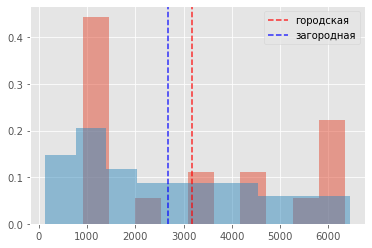

In [7]:
two_histograms(x, y)

Распределение значений далеко от нормального распределению что не позволяет применить критерий Стьюдента. Голубая гистограмма имеет скачок в районе 1000, а далее идет плавный спад плотности распределения, но гистограмма сильно асимметрична. Краснная гистограмма имеет высокую плотность в начале и конце распредления и пробелы в плотности, нет колокообразной формы.<br> Можно поробовать применить непараметрические критерии. Так как у меня в разных выборках находятся разные объекты (больницы), применю критерий Манна-Уитни.

In [8]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


p-value получилось достаточно большим, поэтому у меня нет оснований отвергнуть основную гипотезу. Вывод: расходы больниц за год в городе и за городом различаются незначительно.

## Задача №2

**Данные:** Unions and State Labor Law

**Задание:** Сравнить штаты США на 1982 год, в которых принят закон State right-to-work law (код 1) и те, в которых закон не принят (код 0).

In [9]:
os.chdir("C:/Users/oibuz/Documents/Repository/analysis-data-python/")

In [10]:
df_2 = pd.read_csv('Unions and State Labor Law_data', sep='\s+')
df_2.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


**Основная гипотеза:** проценты муниципальных служащих, состоящих в профсоюзах в 1982 в штатах США, в которых принят закон State right-to-work law и те, в которых такой закон не принят, равны

**Альтернативная гипотеза:** проценты муниципальных служащих, состоящих в профсоюзах в 1982 в штатах США, в которых принят закон State right-to-work law и те, в которых такой закон не принят, неравны

Выборки не парные. Предварительно нужно проверить нормальность данных и равенство дисперсий

In [11]:
x_2 = df_2[df_2['RTW'] == 0]['DENS']
y_2 = df_2[df_2['RTW'] == 1]['DENS']
x_2.name, y_2.name = 'не принят', 'принят'

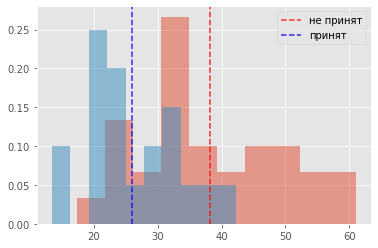

In [12]:
two_histograms(x_2, y_2)

По гистограммам видно, что плотности распределений похожи на нормальные. В первой (красной) гистограмме присутствует ассиметрия, много значений скопилось в конце и рост в центре резкий, но виден колоколообразный силуэт. В голубой гистограмме также прослеживается вид нормального распределения, несмотря на пробел в плотности. Поэтому буду пользоваться критерием Стьюдента.<br>
<br>
Критерием Флигнера-Килина проверим, равны ли дисперсии.

In [13]:
res_2 = stats.fligner(x_2, y_2)
print('p-value:', res_2[1])

p-value: 0.12569758439648204


Значение p-value больше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий не отвергаем. В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [14]:
res_2 = stats.ttest_ind(x_2, y_2, equal_var=True)
print('p-value: ', res_2[1])

p-value:  9.287017631717846e-05


Значение p-value сильно меньше уровня значимости, поэтому есть основания отвергнуть основную гипотезу. Вывод: проценты муниципальных служащих в профсоюзах в 1982 в штатах США, в которых принят закон State right-to-work law **ниже** чем в тех, в которых такой закон не принят. 

Согласно закону State right-to-work law, работникам на рабочих местах, объединенных в профсоюзы, запрещается заключать контракты, которые требуют, чтобы работники, не являющиеся членами профсоюзов, оплачивали расходы, связанные с представительством профсоюзов. Соответственно, принятие такого закона не выгодно муниципальным служащим, состоящим в профсоюзах. И в штатах,где процент таких муниципальных служащих выше, такой закон принимался реже.